<a href="https://colab.research.google.com/github/brayanricardo13/Analisis-Econometrico/blob/main/VAR_Value_at_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

In [2]:
import yfinance as yf ,numpy as np, datetime as dt, matplotlib.pyplot as plt 
from scipy.stats import norm

In [4]:
tickers = ["VOO","QQQ","AAPL","AMZN","JPM"]
weight = np.array([0.2,0.2,0.2,0.2,0.2])

In [ ]:
Start = dt.datetime(2019,1,1)
end = dt.datetime.now()

df = yf.download(tickers,Start,end)["Adj Close"]
df

In [ ]:
retourns = df.pct_change() # Retornos 
retourns

In [ ]:
cov_matrix = retourns.cov() # Matriz de varianzas y Covarianzas 
cov_matrix 

In [ ]:
avg_retorns = retourns.mean() # Promedio de retornos 
avg_retorns

In [ ]:
count = retourns.count() # Numero de retornos 
count

In [26]:
Port_mean =avg_retorns @ weight
Port_std = np.sqrt(weight.T @cov_matrix @weight  )

In [ ]:
Port_mean # Media del Portafolio 

In [ ]:
Port_std # Desviacion estandar del portafolio 

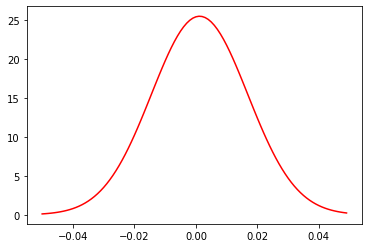

In [32]:
x = np.arange(-0.05,0.05,0.001)
norm_dist = norm.pdf(x,Port_mean,Port_std)
plt.plot(x,norm_dist,color="r")
plt.show()

In [34]:
confidence_level = 0.05
VaR = norm.ppf(confidence_level,Port_mean,Port_std)
VaR

-0.024594024293472568

In [35]:
num_days = 5 
VaR*np.sqrt(num_days)

-0.0549939101604859